# Step 2: Feature Engineering for Customer Segmentation

This notebook creates customer-level features from cleaned retail data for customer segmentation analysis.

## Objectives

1. Create aggregated customer-level features
2. Handle outliers in the data
3. Apply transformations to normalize feature distributions
4. Standardize features for clustering
5. Save processed features for modeling

The goal is to create meaningful features that capture different aspects of customer purchasing behavior.

In [1]:
%load_ext autoreload
%autoreload 2

# Import libraries
import sys
sys.path.append('../src')

from clustering_library import FeatureEngineer
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for matplotlib and seaborn
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("viridis")

c:\Users\tiamo\anaconda3\envs\aio_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Cleaned Data

In [2]:
# Load cleaned UK data
data_path = '../data/processed/cleaned_uk_data.csv'

# Initialize feature engineer and load data
engineer = FeatureEngineer(data_path)
df = engineer.load_data()
df.head()

Data shape: (354321, 11)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,HourOfDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2,8


## Create Customer-Level Features

In [3]:
print(f"Total features to create: {len(engineer.feature_customer)}")
print("Feature list:")
for i, feature in enumerate(engineer.feature_customer, 1):
    print(f"{i:2d}. {feature}")

Total features to create: 16
Feature list:
 1. Sum_Quantity
 2. Mean_UnitPrice
 3. Mean_TotalPrice
 4. Sum_TotalPrice
 5. Count_Invoice
 6. Count_Stock
 7. Mean_InvoiceCountPerStock
 8. Mean_StockCountPerInvoice
 9. Mean_UnitPriceMeanPerInvoice
10. Mean_QuantitySumPerInvoice
11. Mean_TotalPriceMeanPerInvoice
12. Mean_TotalPriceSumPerInvoice
13. Mean_UnitPriceMeanPerStock
14. Mean_QuantitySumPerStock
15. Mean_TotalPriceMeanPerStock
16. Mean_TotalPriceSumPerStock


In [4]:
# Create customer-level features
customer_features = engineer.create_customer_features()
customer_features.head()

Calculating features for each customer...
Processed 500/3920 customers...
Processed 1000/3920 customers...
Processed 1500/3920 customers...
Processed 2000/3920 customers...
Processed 2500/3920 customers...
Processed 3000/3920 customers...
Processed 3500/3920 customers...
✓ Completed feature calculation!


,CustomerID,Sum_Quantity,Mean_UnitPrice,Mean_TotalPrice,Sum_TotalPrice,Count_Invoice,Count_Stock,Mean_InvoiceCountPerStock,Mean_StockCountPerInvoice,Mean_UnitPriceMeanPerInvoice,Mean_QuantitySumPerInvoice,Mean_TotalPriceMeanPerInvoice,Mean_TotalPriceSumPerInvoice,Mean_UnitPriceMeanPerStock,Mean_QuantitySumPerStock,Mean_TotalPriceMeanPerStock,Mean_TotalPriceSumPerStock
0,12346,74215.0,1.040000,77183.600000,77183.60,1.0,1.0,1.000000,1.000000,1.040000,74215.000000,77183.600000,77183.600000,1.040000,74215.000000,77183.600000,77183.600000
1,12747,1275.0,4.367864,40.737961,4196.01,11.0,42.0,2.452381,9.363636,4.253949,115.909091,43.645453,381.455455,4.844583,30.357143,27.983690,99.905000
2,12748,25747.0,2.656279,7.338353,33719.73,209.0,1768.0,2.598982,21.985646,8.916506,123.191388,16.378101,161.338421,2.726409,14.562783,8.176556,19.072245
3,12749,1471.0,4.999950,20.557186,4090.88,5.0,160.0,1.243750,39.800000,5.095433,294.200000,21.871511,818.176000,4.785563,9.193750,20.025448,25.568000
4,12820,722.0,1.904746,15.971864,942.34,4.0,55.0,1.072727,14.750000,1.902633,180.500000,16.051496,235.585000,1.808727,13.127273,15.816182,17.133455


### Feature Descriptions

16 customer-level features capture different aspects of purchasing behavior:

**Basic Metrics:**
* 1. `Sum_Quantity`: Total quantity of products purchased
* 2. `Mean_UnitPrice`: Average price per unit across all purchases
* 3. `Mean_TotalPrice`: Average transaction amount
* 4. `Sum_TotalPrice`: Total amount spent (customer lifetime value)
* 5. `Count_Invoice`: Number of unique transactions
* 6. `Count_Stock`: Number of unique products purchased

**Product Aggregations:**
* 7. `Mean_InvoiceCountPerStock`: Average purchase frequency per product
* 8. `Mean_StockCountPerInvoice`: Average number of different products per transaction

**Invoice Aggregations:**
* 9. `Mean_UnitPriceMeanPerInvoice`: Average unit price per transaction
* 10. `Mean_QuantitySumPerInvoice`: Average quantity per transaction
* 11. `Mean_TotalPriceMeanPerInvoice`: Average amount per product in transaction
* 12. `Mean_TotalPriceSumPerInvoice`: Average total spending per transaction

**Product Type Aggregations:**
* 13. `Mean_UnitPriceMeanPerStock`: Average price level per product
* 14. `Mean_QuantitySumPerStock`: Average quantity purchased per product
* 15. `Mean_TotalPriceMeanPerStock`: Average spending per product
* 16. `Mean_TotalPriceSumPerStock`: Average total spending per product

These features help identify different customer segments based on their purchasing patterns.

In [5]:
# Display created feature information
print(f"Features created successfully:")
print(f"- Number of customers: {customer_features.shape[0]:,}")
print(f"- Number of features: {customer_features.shape[1] - 1}")

customer_features.set_index('CustomerID').describe().round(2)

Features created successfully:
- Number of customers: 3,920
- Number of features: 16


,Sum_Quantity,Mean_UnitPrice,Mean_TotalPrice,Sum_TotalPrice,Count_Invoice,Count_Stock,Mean_InvoiceCountPerStock,Mean_StockCountPerInvoice,Mean_UnitPriceMeanPerInvoice,Mean_QuantitySumPerInvoice,Mean_TotalPriceMeanPerInvoice,Mean_TotalPriceSumPerInvoice,Mean_UnitPriceMeanPerStock,Mean_QuantitySumPerStock,Mean_TotalPriceMeanPerStock,Mean_TotalPriceSumPerStock
count,3920.00,3920.00,3920.00,3920.00,3920.00,3920.00,3920.00,3920.00,3920.00,3920.00,3920.00,3920.00,3920.00,3920.00,3920.00,3920.00
mean,1085.90,4.46,71.76,1864.39,4.25,60.73,1.27,21.95,4.95,243.21,82.42,393.33,4.54,59.28,70.75,94.49
std,3737.51,35.96,1543.98,7482.82,7.20,81.67,0.53,20.12,36.85,1373.25,1841.08,1869.97,36.39,1277.35,1543.89,1665.41
min,1.00,0.12,2.10,3.75,1.00,1.00,1.00,1.00,0.12,1.00,2.10,3.45,0.12,1.00,2.14,2.23
25%,154.00,2.15,11.19,300.28,1.00,15.00,1.00,9.00,2.16,90.29,12.49,174.40,2.15,6.54,10.75,13.27
50%,365.00,2.85,17.28,652.28,2.00,35.00,1.10,16.76,2.91,156.58,17.84,281.62,2.87,11.21,17.06,19.39
75%,950.25,3.74,24.39,1576.58,5.00,77.00,1.32,28.00,3.85,262.00,26.74,409.69,3.71,17.88,23.43,30.43
max,80997.00,2033.10,77183.60,259657.30,209.00,1768.00,14.14,300.65,2033.10,74215.00,84235.52,84236.25,2033.10,74215.00,77183.60,77183.60


## Transform Features

To prepare features for clustering, we will apply Box-Cox transformation to normalize data distributions.

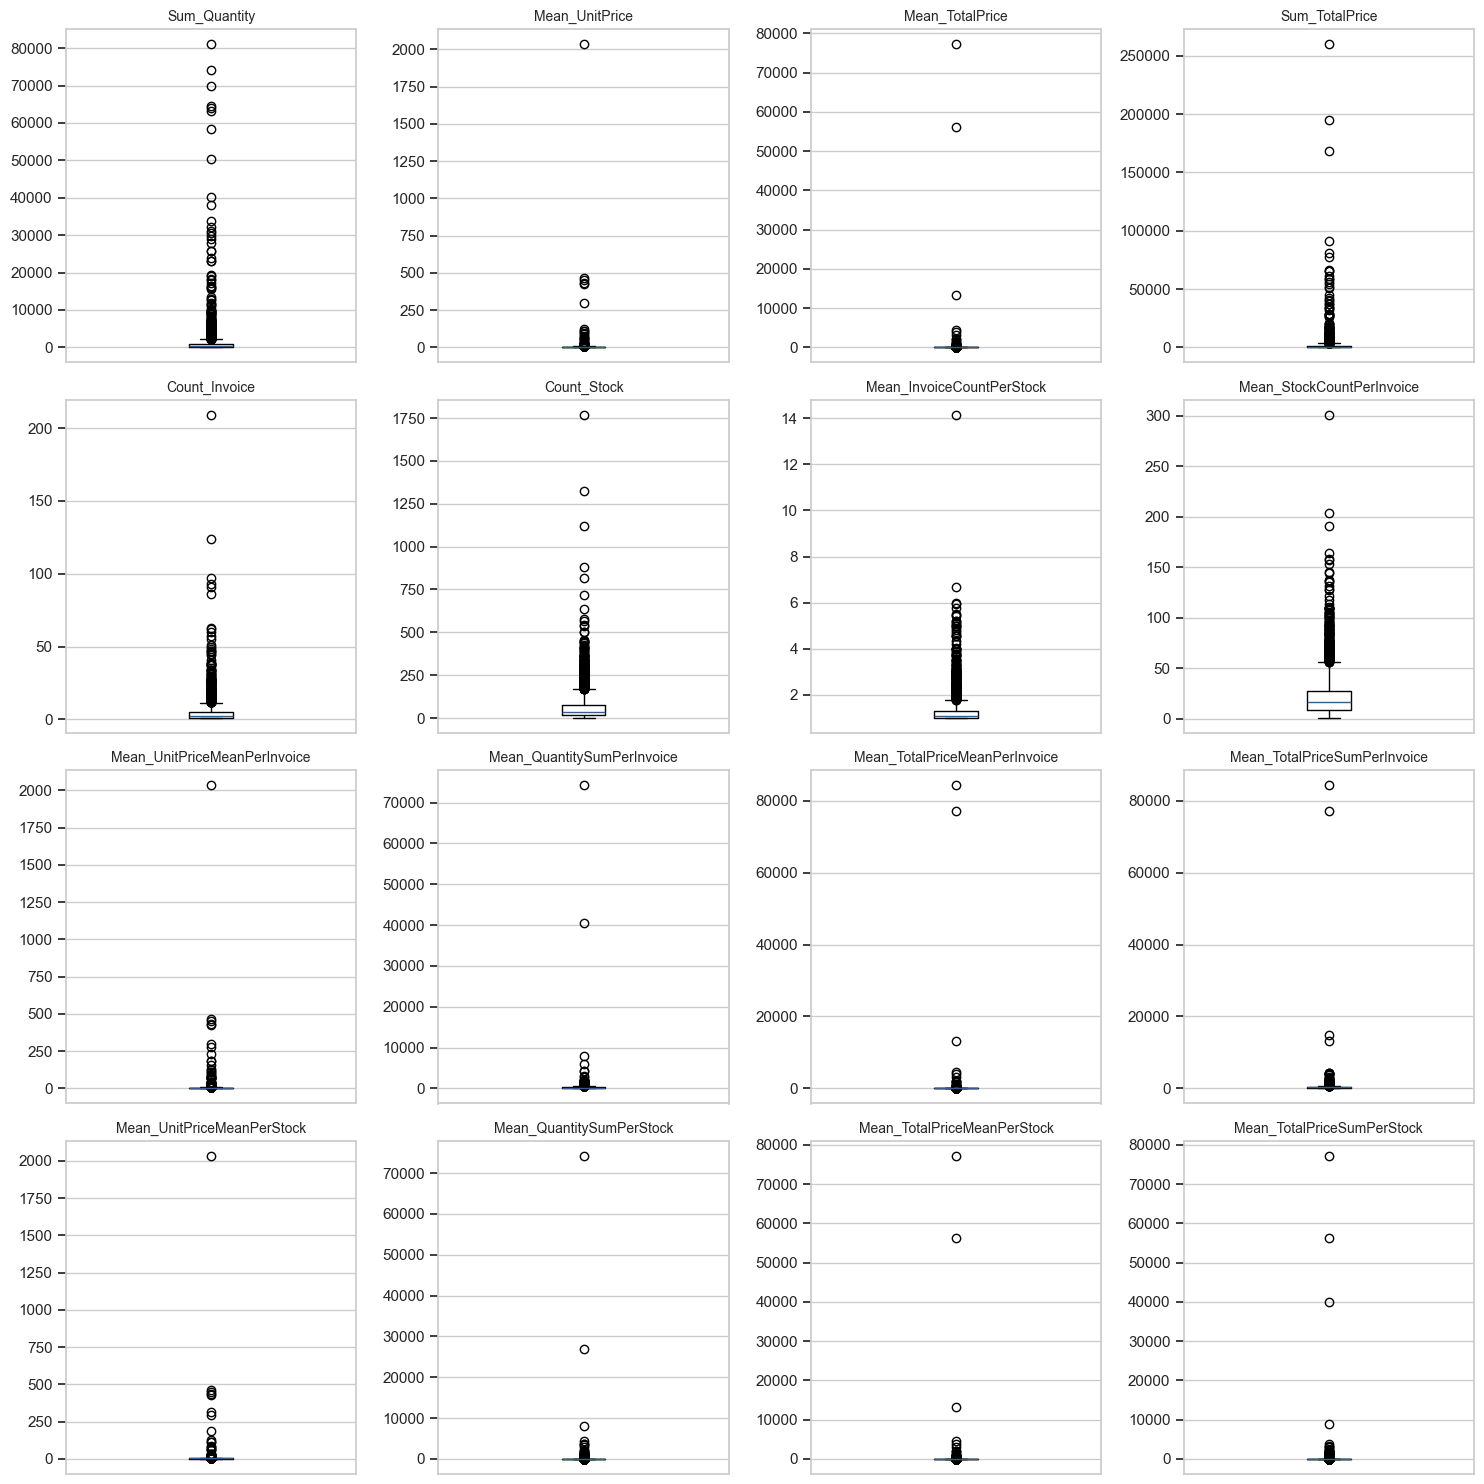

In [6]:
# Visualize all features before Box-Cox transformation
engineer.plot_features_boxplots(transformed=False)

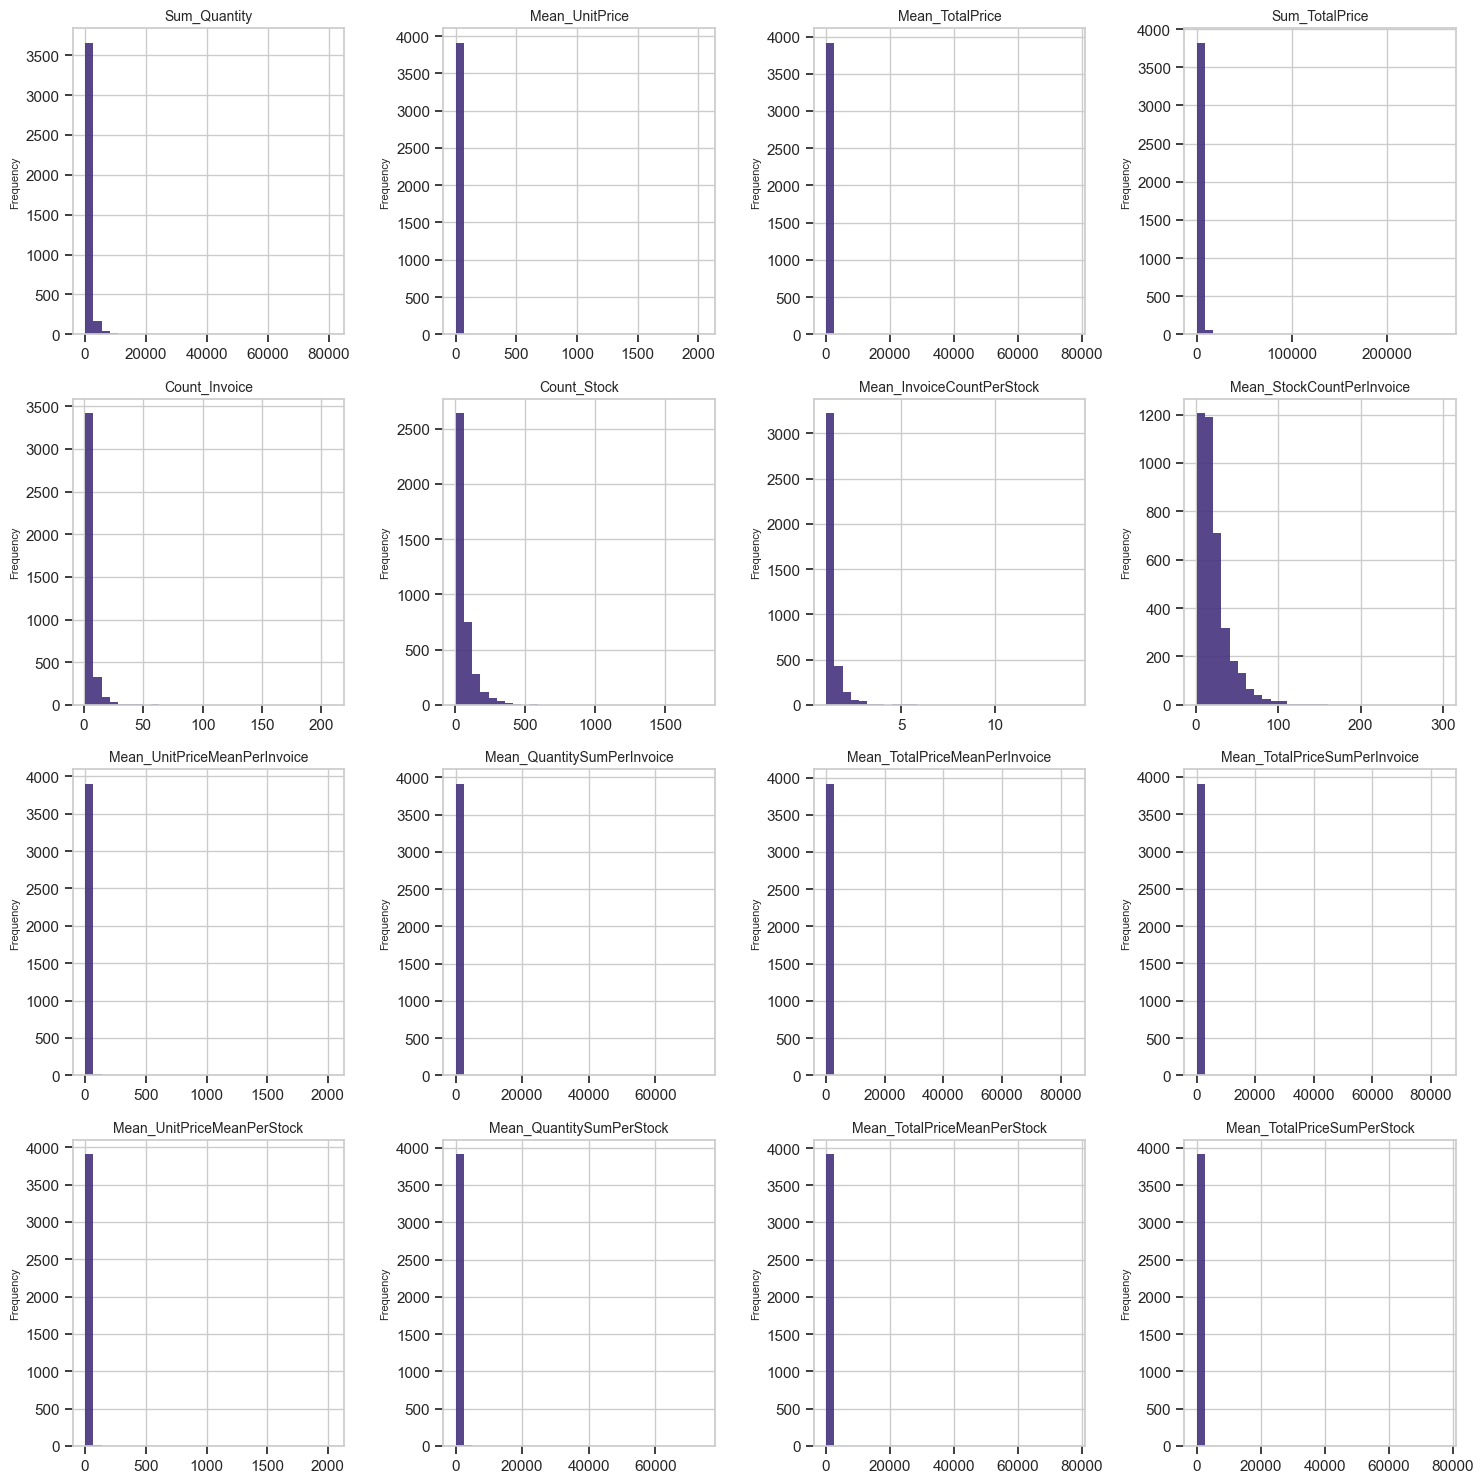

In [7]:
# Visualize feature distributions with histograms
engineer.plot_features_histograms(transformed=False)

In [8]:
# Apply Box-Cox transformation to normalize feature distributions
customer_features_transformed = engineer.transform_features()
customer_features_transformed.head()

Applying Box-Cox transformation...
✓ Box-Cox transformation completed!


,Sum_Quantity,Mean_UnitPrice,Mean_TotalPrice,Sum_TotalPrice,Count_Invoice,Count_Stock,Mean_InvoiceCountPerStock,Mean_StockCountPerInvoice,Mean_UnitPriceMeanPerInvoice,Mean_QuantitySumPerInvoice,Mean_TotalPriceMeanPerInvoice,Mean_TotalPriceSumPerInvoice,Mean_UnitPriceMeanPerStock,Mean_QuantitySumPerStock,Mean_TotalPriceMeanPerStock,Mean_TotalPriceSumPerStock
CustomerID,,,,,,,,,,,,,,,,
12346,11.164285,0.579139,3.032667,7.273182,0.538600,0.713031,0.160394,0.725013,0.568477,17.412270,3.071619,9.900430,0.577272,2.817037,2.927196,2.801209
12747,7.130948,1.055004,2.175445,5.993575,1.115456,4.398995,0.162610,2.728380,1.007433,5.700097,2.210787,5.553340,1.077341,2.007763,2.022539,2.288700
12748,10.114725,0.898575,1.538527,6.940597,1.291133,10.288451,0.162628,3.861852,1.180633,5.786012,1.880148,4.799707,0.902158,1.768431,1.566613,1.856994
12749,7.273012,1.093966,1.953147,5.980992,0.977778,6.290526,0.161558,4.753462,1.054680,7.059855,1.986780,6.210706,1.073901,1.592967,1.912346,1.950455
12820,6.566002,0.785869,1.860338,5.205462,0.927784,4.761404,0.160846,3.309435,0.764813,6.334291,1.872435,5.132785,0.764591,1.730544,1.828391,1.820804


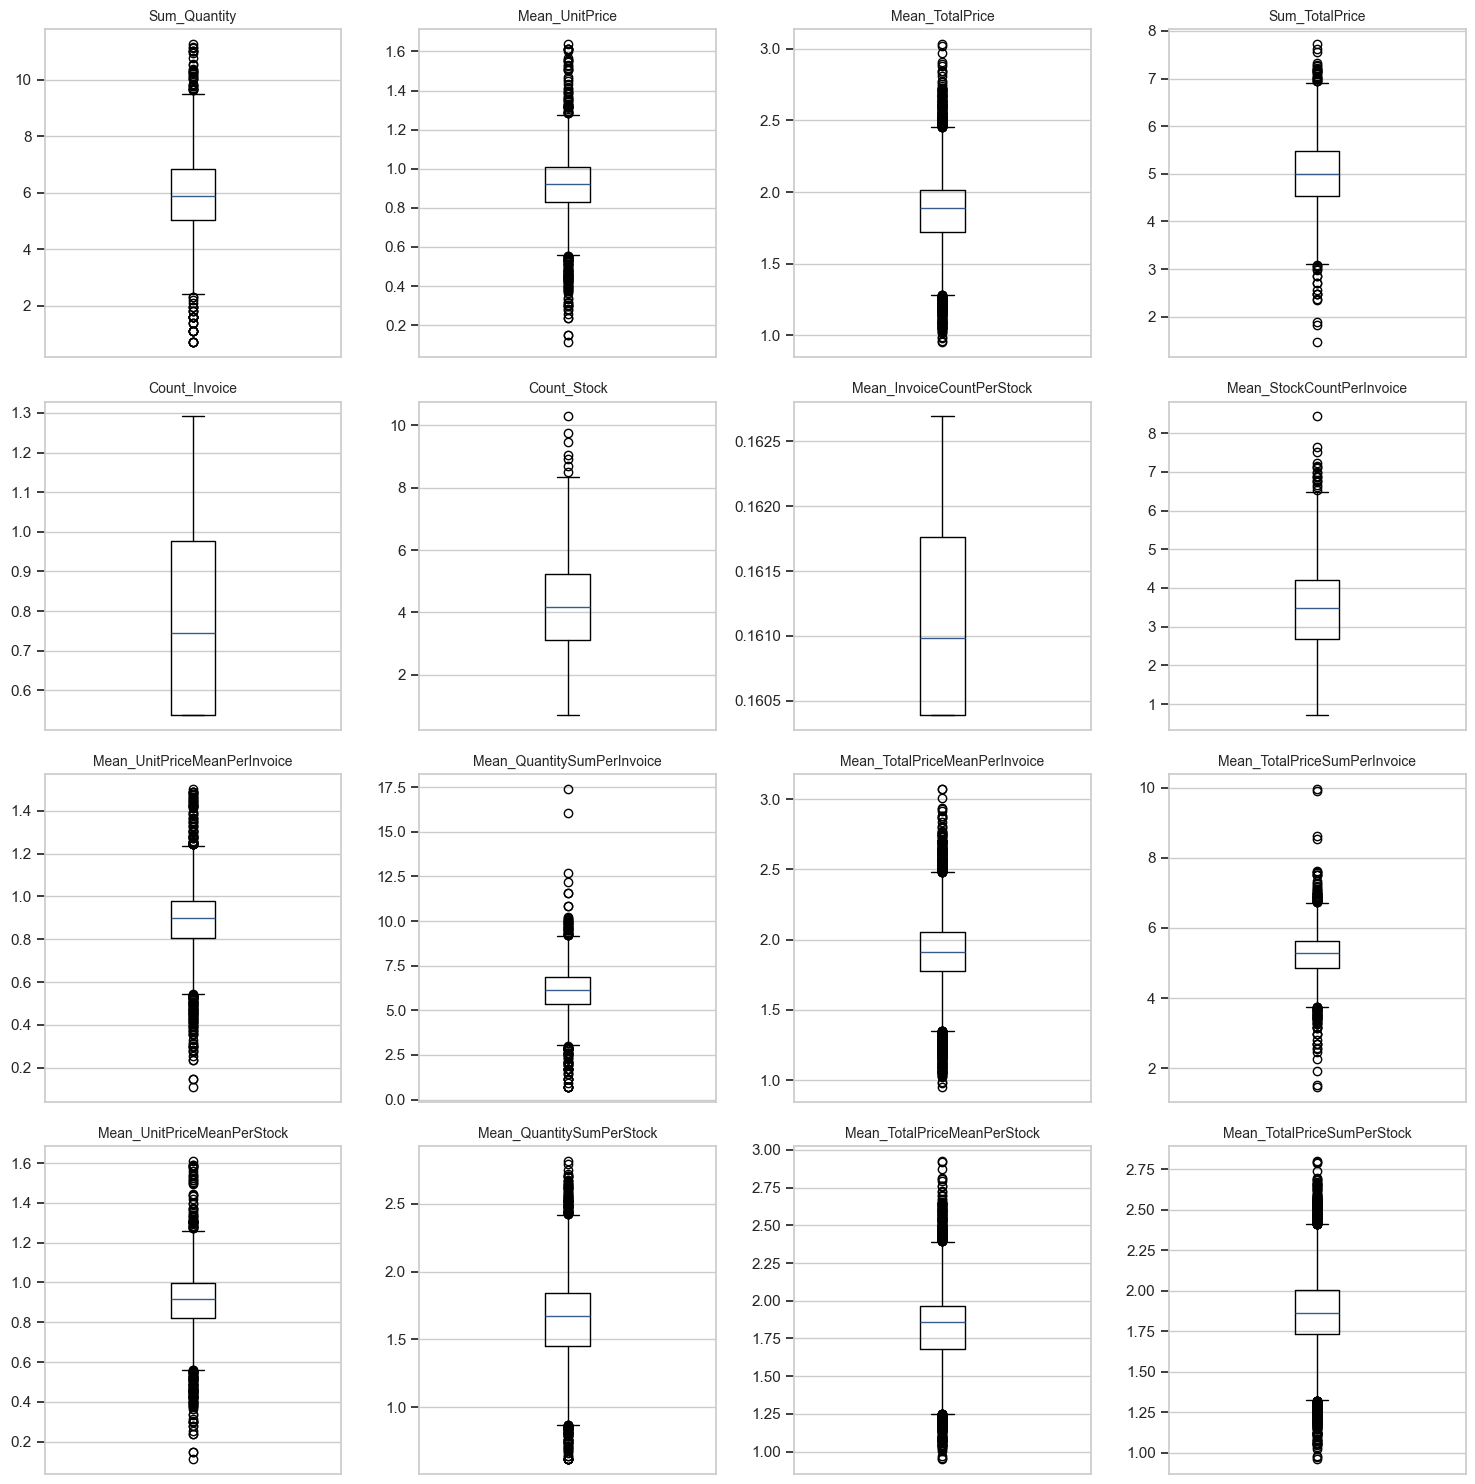

In [9]:
# Visualize all features after Box-Cox transformation
engineer.plot_features_boxplots(transformed=True)

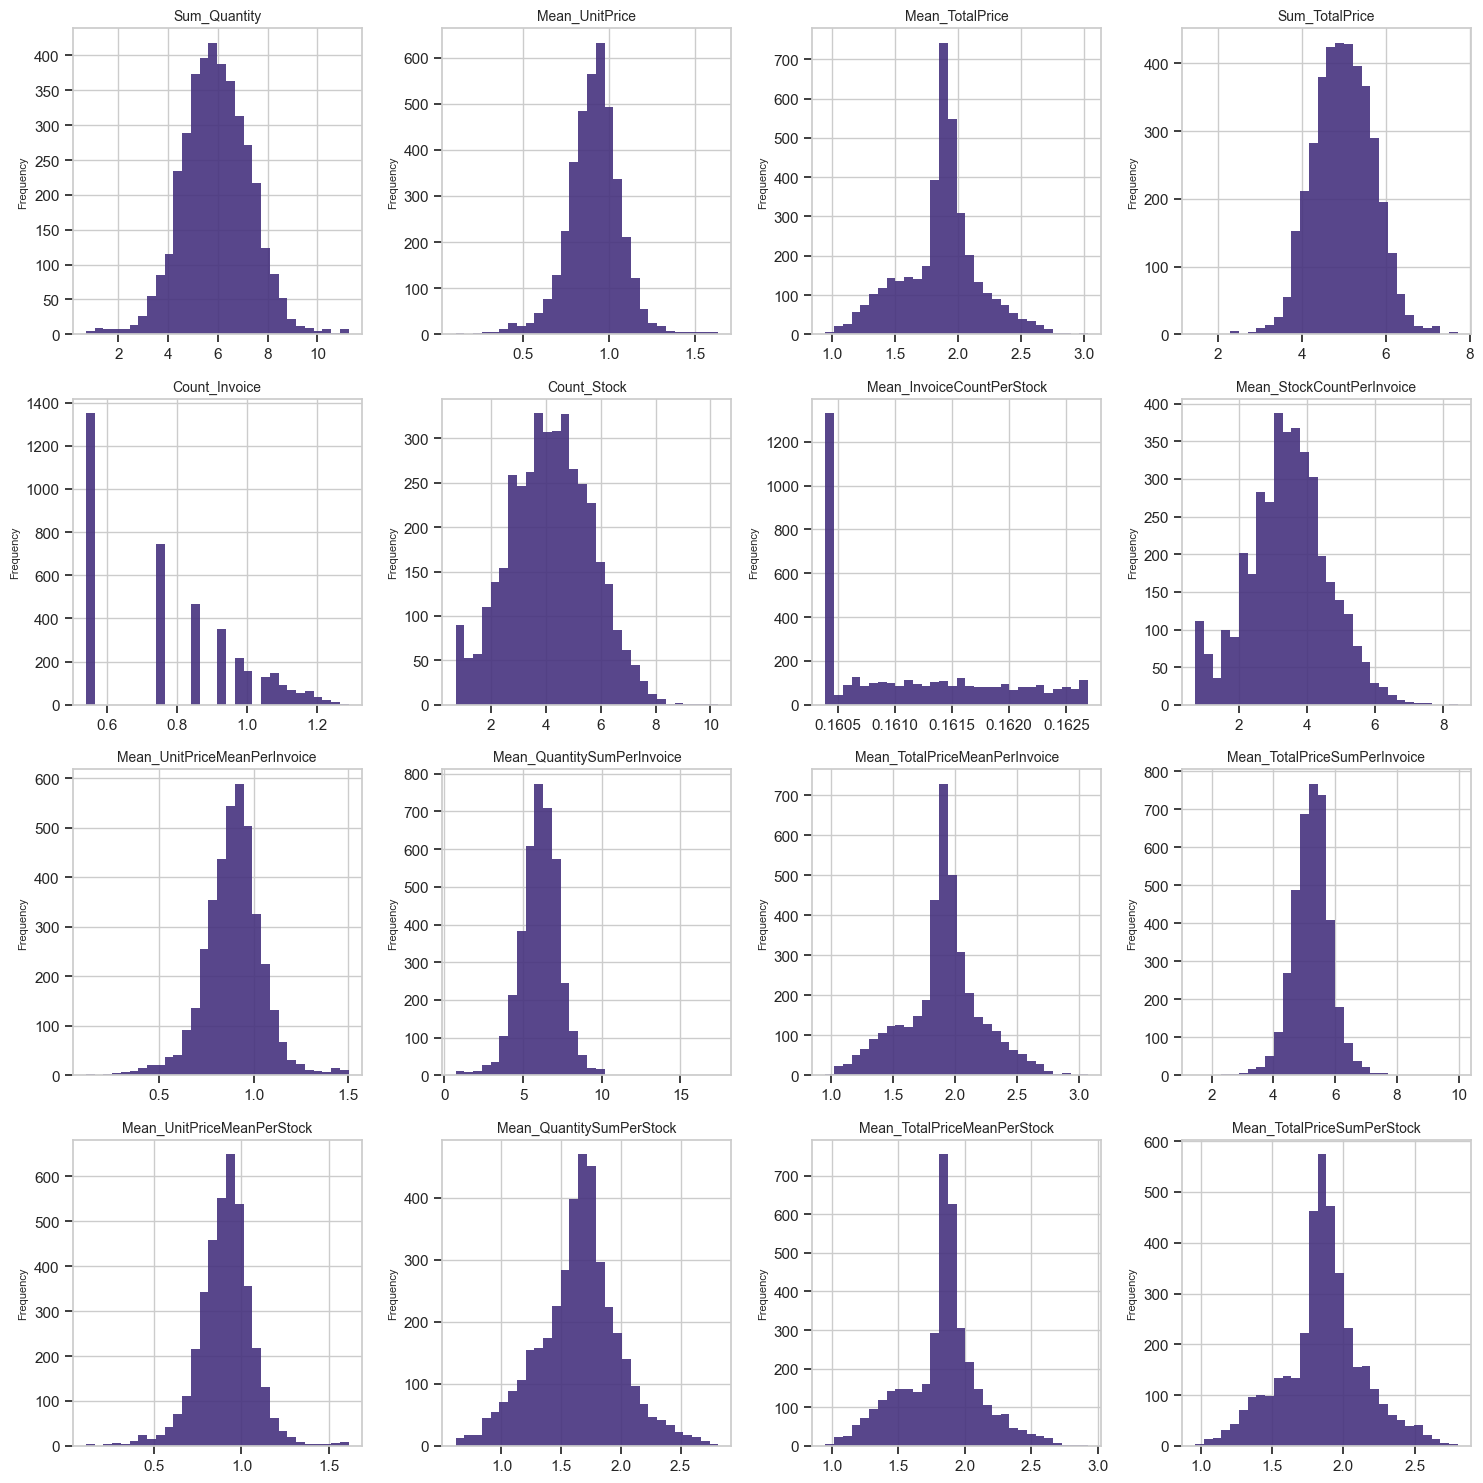

In [10]:
# Visualize feature distributions after Box-Cox transformation with histograms
engineer.plot_features_histograms(transformed=True)

## Standardize Features

In [11]:
# Apply standardization (mean=0, std=1)
customer_features_scaled = engineer.scale_features()
print(f"Standardized feature size: {customer_features_scaled.shape}")
# display(customer_features_scaled.describe().round(2).loc[['mean', 'std']])
customer_features_scaled.head()

✓ Feature scaling completed!
Standardized feature size: (3920, 16)


,Sum_Quantity,Mean_UnitPrice,Mean_TotalPrice,Sum_TotalPrice,Count_Invoice,Count_Stock,Mean_InvoiceCountPerStock,Mean_StockCountPerInvoice,Mean_UnitPriceMeanPerInvoice,Mean_QuantitySumPerInvoice,Mean_TotalPriceMeanPerInvoice,Mean_TotalPriceSumPerInvoice,Mean_UnitPriceMeanPerStock,Mean_QuantitySumPerStock,Mean_TotalPriceMeanPerStock,Mean_TotalPriceSumPerStock
CustomerID,,,,,,,,,,,,,,,,
12346,3.851787,-2.120200,3.800724,3.208210,-1.158331,-2.283759,-1.017361,-2.306882,-2.100615,8.841885,3.718257,7.383300,-2.142004,3.387146,3.763067,3.342710
12747,0.882453,0.880121,1.006951,1.405645,1.534230,0.154796,1.951879,-0.614242,0.751290,-0.306068,0.973938,0.485462,1.080004,1.042357,0.667834,1.528082
12748,3.079103,-0.106164,-1.068831,2.739703,2.354231,4.051134,1.976092,0.343426,1.876575,-0.238963,-0.080134,-0.710380,-0.048723,0.348918,-0.892094,-0.000453
12749,0.987040,1.125774,0.282458,1.387919,0.891601,1.406192,0.541901,1.096745,1.058261,0.755990,0.259807,1.528552,1.057839,-0.159472,0.290815,0.330463
12820,0.466541,-0.816774,-0.020015,0.295441,0.658243,0.394558,-0.410914,-0.123310,-0.825019,0.189277,-0.104723,-0.181862,-0.935086,0.239145,0.003566,-0.128590


## Save Processed Features

In [12]:
# Save processed features for clustering
engineer.save_features()

print("Results summary:")
print(f"- Total customers: {customer_features_scaled.shape[0]:,}")
print(f"- Total features: {customer_features_scaled.shape[1]}")
print("- Saved files:")
print("  + customer_features.csv: Original features")
print("  + customer_features_transformed.csv: Box-Cox transformed features")
print("  + customer_features_scaled.csv: Standardized features (ready for clustering)")

✓ Saved all features to: ../data/processed
Results summary:
- Total customers: 3,920
- Total features: 16
- Saved files:
  + customer_features.csv: Original features
  + customer_features_transformed.csv: Box-Cox transformed features
  + customer_features_scaled.csv: Standardized features (ready for clustering)


## Feature Engineering Summary

**Feature Creation**
- Created 16 customer-level features capturing different aspects of purchasing behavior
- Features are aggregated at customer level from transaction data
- Created features for:
  - **Basic metrics**: Total quantity, average/total spending, transaction count, product count
  - **Invoice aggregations**: Average patterns per transaction
  - **Product aggregations**: Average patterns per product

**Data Transformation**
- Applied Box-Cox transformation to normalize feature distributions
- Standardized features to have mean of 0 and variance of 1 using StandardScaler

**Output Files**
- `customer_features.csv`: Original aggregated features
- `customer_features_transformed.csv`: Box-Cox transformed features  
- `customer_features_scaled.csv`: Standardized features (ready for clustering)